## Capstone 2 Analysis - Rachel Menth

### How has crime changed in Philadelphia during the COVID-19 pandemic?

The analysis below will compare <b>incidents reported</b> and <b>arrests made</b> during the COVID-19 pandemic (March - June 2020) to the prior four months (Nov 2019 - Feb 2020) and to the same period in the prior year (March - June 2019). 

The Python analysis will include:
1. Importing Python libraries needed for analysis
2. Importing data sources
3. Data cleansing
4. Exploratory data analysis to evaluate data trends
5. Analysis of percent changes in incidents and arrests
    - Percent change in total incidents
    - Percent change in total arrests
    - Percent change in each incident category
    - Percent change in each arrest category
    - Percent change in incidents per district
6. Exporting cleansed data for further analysis in Tableau
7. Insights
    

<i>This analysis relies on open data sources made available by the City of Philadelphia and the Philadelphia Police Department. </i>

### 1. Importing Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import pandas as pd

### 2. Importing Data Sources

In [2]:
incidents20 = pd.read_csv('2020_incidents_part1_part2-1_070220.csv', parse_dates=True)
incidents19 = pd.read_csv('2019_incidents_part1_part2_062420.csv', parse_dates=True)
arrests = pd.read_csv('arrest_data_daily_citywide_070220.csv', parse_dates=True, index_col='date_value')

#combining incidents files to allow for analysis across both years
incidents = pd.concat([incidents19, incidents20])

### 3. Data Cleansing

In [3]:
print(incidents.info(), arrests.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231924 entries, 0 to 70836
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   objectid            231924 non-null  int64  
 1   dc_dist             231924 non-null  int64  
 2   psa                 231922 non-null  object 
 3   dispatch_date_time  231924 non-null  object 
 4   dispatch_date       231924 non-null  object 
 5   dispatch_time       231924 non-null  object 
 6   hour_               231923 non-null  float64
 7   dc_key              231924 non-null  float64
 8   location_block      231924 non-null  object 
 9   ucr_general         231924 non-null  int64  
 10  text_general_code   231924 non-null  object 
 11  point_x             231741 non-null  float64
 12  point_y             231741 non-null  float64
 13  lat                 231741 non-null  float64
 14  lng                 231741 non-null  float64
dtypes: float64(6), int64(3), object(6)


In [4]:
#Removing trailing spaces from incident description column so duplicate columns aren't created
incidents['text_general_code']=incidents['text_general_code'].str.rstrip(" ")

#Pivoting incidents dataframe so each row represents a single day
incidents.dispatch_date = pd.to_datetime(incidents.dispatch_date)
incidents_pivot = pd.pivot_table(incidents, values=['objectid'], index=['dispatch_date'], columns=['text_general_code'], aggfunc='count', fill_value=0)
print(incidents_pivot.info())

#Pivoting incidents dataframe so each row represents a single district
incidents.dispatch_date = pd.to_datetime(incidents.dispatch_date)
incidents_district = pd.pivot_table(incidents, values=['objectid'], index=['dispatch_date'], columns=['dc_dist'], aggfunc='count', fill_value=0)
print(incidents_district.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2019-01-01 to 2020-07-02
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   (objectid, Aggravated Assault Firearm)               549 non-null    int64
 1   (objectid, Aggravated Assault No Firearm)            549 non-null    int64
 2   (objectid, All Other Offenses)                       549 non-null    int64
 3   (objectid, Arson)                                    549 non-null    int64
 4   (objectid, Burglary Non-Residential)                 549 non-null    int64
 5   (objectid, Burglary Residential)                     549 non-null    int64
 6   (objectid, DRIVING UNDER THE INFLUENCE)              549 non-null    int64
 7   (objectid, Disorderly Conduct)                       549 non-null    int64
 8   (objectid, Embezzlement)                             549 non-null    in

In [5]:
#Calculating new column in incidents and arrests dataframes with total events per day

incidents_pivot['All Incidents'] = incidents_pivot[list(incidents_pivot.columns)].sum(axis=1)
print(incidents_pivot.info())

arrests['All Arrests'] = arrests[list(arrests.columns)].sum(axis=1)
print(arrests.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2019-01-01 to 2020-07-02
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   (objectid, Aggravated Assault Firearm)               549 non-null    int64
 1   (objectid, Aggravated Assault No Firearm)            549 non-null    int64
 2   (objectid, All Other Offenses)                       549 non-null    int64
 3   (objectid, Arson)                                    549 non-null    int64
 4   (objectid, Burglary Non-Residential)                 549 non-null    int64
 5   (objectid, Burglary Residential)                     549 non-null    int64
 6   (objectid, DRIVING UNDER THE INFLUENCE)              549 non-null    int64
 7   (objectid, Disorderly Conduct)                       549 non-null    int64
 8   (objectid, Embezzlement)                             549 non-null    in

In [6]:
#Creating dataframes for each time period in analysis
incidents_c = incidents_pivot['2020-03-01':]
incidents_mp = incidents_pivot['2019-11-01': '2020-02-29']
incidents_yp = incidents_pivot['2019-03-01': '2019-06-30']

arrests_c = arrests['2020-03-01':]
arrests_mp = arrests['2019-11-01': '2020-02-29']
arrests_yp = arrests['2019-03-01': '2019-06-30']

print(incidents_c.describe())

                                    objectid                                \
text_general_code Aggravated Assault Firearm Aggravated Assault No Firearm   
count                             124.000000                    124.000000   
mean                                9.145161                     13.266129   
std                                 4.264990                      4.569444   
min                                 1.000000                      0.000000   
25%                                 6.000000                     10.000000   
50%                                 9.000000                     12.000000   
75%                                11.000000                     16.000000   
max                                25.000000                     26.000000   

                                                                           \
text_general_code All Other Offenses       Arson Burglary Non-Residential   
count                     124.000000  124.000000               12

### 4. Exploratory Data Analysis

In [7]:
#Comparison of basic statistics for incidents in each time period

print('COVID Period\n {}\n'.format(incidents_c['All Incidents'].describe()))
print('4 Months Prior\n {}\n'.format(incidents_mp['All Incidents'].describe()))
print('1 Year Prior\n {}\n'.format(incidents_yp['All Incidents'].describe()))

COVID Period
 count    124.000000
mean     363.564516
std       90.540225
min        9.000000
25%      319.500000
50%      349.500000
75%      402.500000
max      896.000000
Name: All Incidents, dtype: float64

4 Months Prior
 count    121.000000
mean     415.578512
std       63.277531
min       72.000000
25%      384.000000
50%      427.000000
75%      459.000000
max      541.000000
Name: All Incidents, dtype: float64

1 Year Prior
 count    122.000000
mean     446.311475
std       56.053853
min      298.000000
25%      404.000000
50%      455.000000
75%      489.000000
max      543.000000
Name: All Incidents, dtype: float64



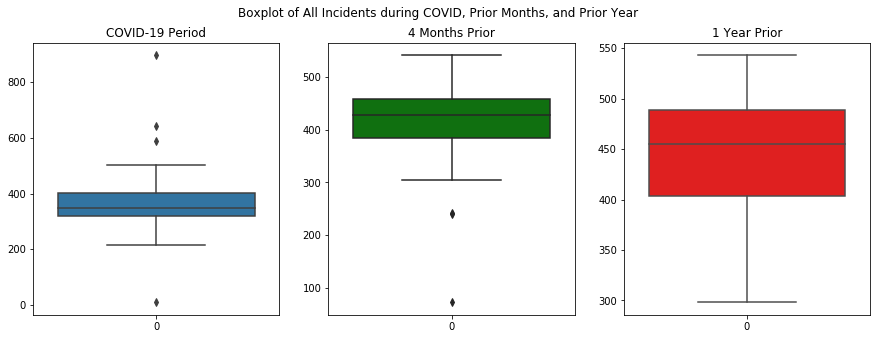

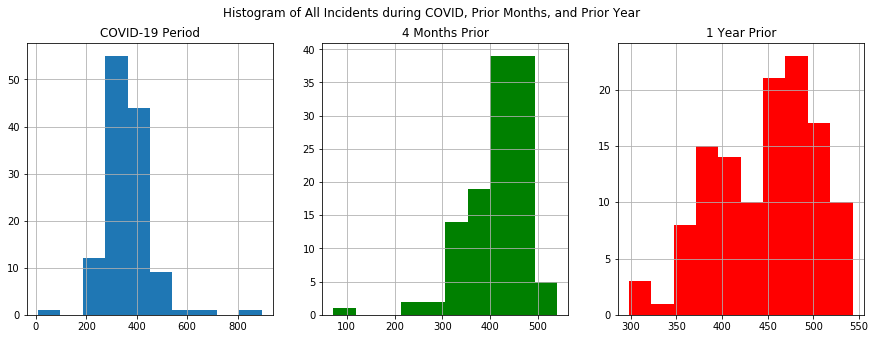

In [8]:
#Checking for data skew and outliers in incidents dataframe using boxplots and histograms

#boxplots
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Boxplot of All Incidents during COVID, Prior Months, and Prior Year")
plt.subplot(1,3,1)
sns.boxplot(data=incidents_c['All Incidents'])
plt.title('COVID-19 Period')
plt.subplot(1,3,2)
sns.boxplot(data=incidents_mp['All Incidents'], color='green') 
plt.title('4 Months Prior')
plt.subplot(1,3,3)
sns.boxplot(data=incidents_yp['All Incidents'], color='red') 
plt.title('1 Year Prior')
plt.show()

#histograms
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Histogram of All Incidents during COVID, Prior Months, and Prior Year")
plt.subplot(1,3,1)
incidents_c['All Incidents'].hist()
plt.title('COVID-19 Period')
plt.subplot(1,3,2)
incidents_mp['All Incidents'].hist(color='green') 
plt.title('4 Months Prior')
plt.subplot(1,3,3)
incidents_yp['All Incidents'].hist(color='red') 
plt.title('1 Year Prior')
plt.show()

In [9]:
#Comparison of basic statistics for arrests in each time period

print('COVID Period\n {}\n'.format(arrests_c['All Arrests'].describe()))
print('4 Months Prior\n {}\n'.format(arrests_mp['All Arrests'].describe()))
print('1 Year Prior\n {}\n'.format(arrests_yp['All Arrests'].describe()))

COVID Period
 count    122.000000
mean      59.131148
std       38.212747
min        8.000000
25%       33.250000
50%       50.500000
75%       71.500000
max      235.000000
Name: All Arrests, dtype: float64

4 Months Prior
 count    121.000000
mean     100.884298
std       28.100175
min       31.000000
25%       81.000000
50%       98.000000
75%      119.000000
max      197.000000
Name: All Arrests, dtype: float64

1 Year Prior
 count    122.000000
mean     114.827869
std       26.060861
min       67.000000
25%       93.250000
50%      119.000000
75%      130.750000
max      217.000000
Name: All Arrests, dtype: float64



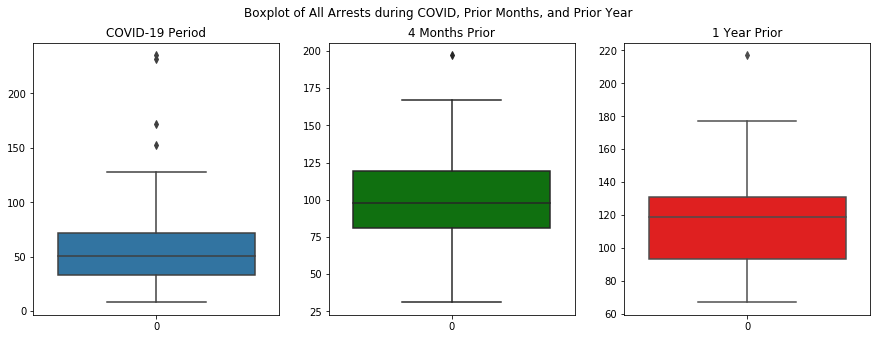

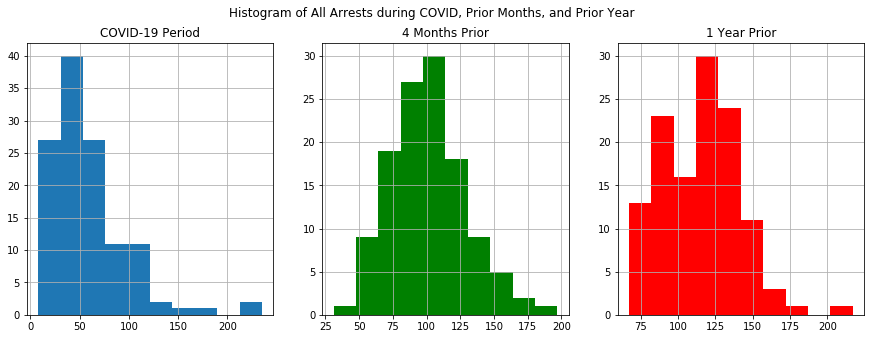

In [10]:
#Checking for data skew and outliers in arrests dataframe using boxplots and histograms

#boxplots
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Boxplot of All Arrests during COVID, Prior Months, and Prior Year")
plt.subplot(1,3,1)
sns.boxplot(data=arrests_c['All Arrests'])
plt.title('COVID-19 Period')
plt.subplot(1,3,2)
sns.boxplot(data=arrests_mp['All Arrests'], color='green') 
plt.title('4 Months Prior')
plt.subplot(1,3,3)
sns.boxplot(data=arrests_yp['All Arrests'], color='red') 
plt.title('1 Year Prior')
plt.show()

#histograms
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Histogram of All Arrests during COVID, Prior Months, and Prior Year")
plt.subplot(1,3,1)
arrests_c['All Arrests'].hist()
plt.title('COVID-19 Period')
plt.subplot(1,3,2)
arrests_mp['All Arrests'].hist(color='green') 
plt.title('4 Months Prior')
plt.subplot(1,3,3)
arrests_yp['All Arrests'].hist(color='red') 
plt.title('1 Year Prior')
plt.show()

### 5a. Analysis
What is the percent change in incidents during COVID-19 period? 

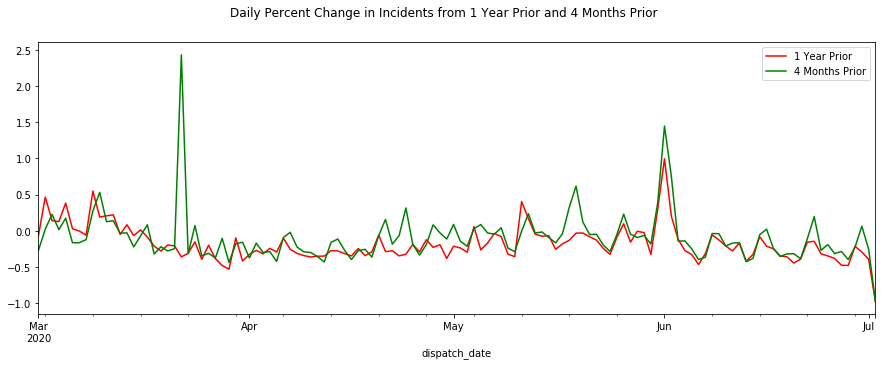

Total Incidents During COVID: 45082
Total Incidents 4 Months Prior: 50285 (-10.347% change)
Total Incidents 1 Year Prior: 54450 (-17.2048% change)


In [12]:
#plotting daily percent change
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Daily Percent Change in Incidents from 1 Year Prior and 4 Months Prior")

incidents_yoy = incidents_pivot['All Incidents'].pct_change(periods=365)
incidents_yoy['2020-03-01':].plot(color='red')

incidents_mom = incidents_pivot['All Incidents'].pct_change(periods=121)
incidents_mom['2020-03-01':].plot(color='green')

plt.legend(['1 Year Prior', '4 Months Prior'])
plt.show()

#calculating total incidents per period for percent change calc 
incidents_all = incidents_pivot['All Incidents']
incidents_all_c = sum(incidents_all['2020-03-01':])
incidents_all_yp = sum(incidents_all['2019-03-01':'2019-06-30'])
incidents_all_mp = sum(incidents_all['2019-11-01':'2020-02-29'])


print('Total Incidents During COVID: {}'.format(incidents_all_c))
print('Total Incidents 4 Months Prior: {} ({}% change)'.format(incidents_all_mp, round((incidents_all_c-incidents_all_mp)/incidents_all_mp*100,4)))
print('Total Incidents 1 Year Prior: {} ({}% change)'.format(incidents_all_yp, round((incidents_all_c-incidents_all_yp)/incidents_all_yp*100,4)))

### 5b. Analysis
What is the percent change in arrests during COVID-19 period? 

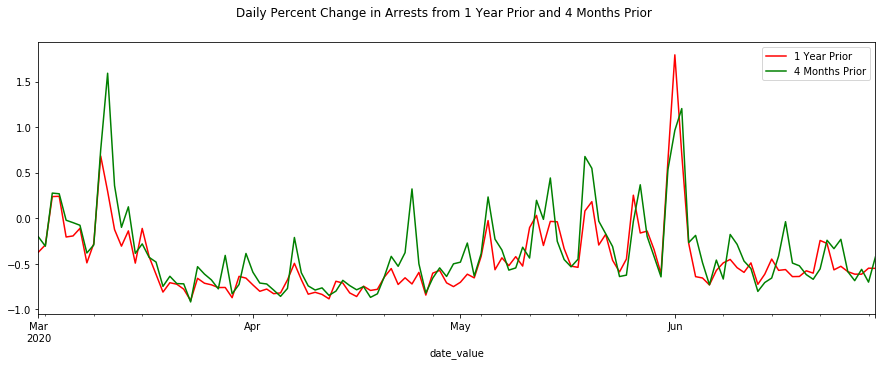

Total Arrests During COVID: 7214
Total Arrests 4 Months Prior: 50285 (-40.9028% change)
Total Arrests 1 Year Prior: 14009 (-48.5045% change)


In [13]:
#plotting daily percent change
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Daily Percent Change in Arrests from 1 Year Prior and 4 Months Prior")

arrests_yoy = arrests['All Arrests'].pct_change(periods=365)
arrests_yoy['2020-03-01':].plot(color='red')

arrests_mom = arrests['All Arrests'].pct_change(periods=121)
arrests_mom['2020-03-01':].plot(color='green')

plt.legend(['1 Year Prior', '4 Months Prior'])
plt.show()

#calculating total arrests per period for percent change calc 
arrests_all = arrests['All Arrests']
arrests_all_c = sum(arrests_all['2020-03-01':])
arrests_all_yp = sum(arrests_all['2019-03-01':'2019-06-30'])
arrests_all_mp = sum(arrests_all['2019-11-01':'2020-02-29'])


print('Total Arrests During COVID: {}'.format(arrests_all_c))
print('Total Arrests 4 Months Prior: {} ({}% change)'.format(incidents_all_mp, round((arrests_all_c-arrests_all_mp)/arrests_all_mp*100,4)))
print('Total Arrests 1 Year Prior: {} ({}% change)'.format(arrests_all_yp, round((arrests_all_c-arrests_all_yp)/arrests_all_yp*100,4)))

### 5c. Analysis
What is the percent change in each incident category?

In [14]:
print('Percent Change in Incidents by Category\n')

#loop calculating percent change for each incident category
for column in incidents_pivot :
    crime = incidents_pivot[column]
    crime_c = sum(crime['2020-03-01':])
    crime_yp = sum(crime['2019-03-01':'2019-06-30'])
    crime_mp = sum(crime['2019-11-01': '2020-02-29'])
    try:
        yoy_prct_change = round(((crime_c-crime_yp)/crime_yp)*100,4)
    except ZeroDivisionError as err:
        pass
    try:
        mom_prct_change = round(((crime_c-crime_mp)/crime_mp)*100,4)
    except ZeroDivisionError as err:
        pass
    column_str = "".join(column)
    name = column_str.lstrip('objectid')
    print('{}\n{}% change from 1 year prior. {}% change from 4 months prior\n'.format(name, yoy_prct_change, mom_prct_change))


Percent Change in Incidents by Category

Aggravated Assault Firearm
25.4425% change from 1 year prior. 36.7913% change from 4 months prior

Aggravated Assault No Firearm
-15.7706% change from 1 year prior. -7.1146% change from 4 months prior

All Other Offenses
-48.0293% change from 1 year prior. -23.3058% change from 4 months prior

Arson
31.5436% change from 1 year prior. 40.0% change from 4 months prior

Burglary Non-Residential
376.8156% change from 1 year prior. 221.4689% change from 4 months prior

Burglary Residential
-23.7617% change from 1 year prior. -21.3398% change from 4 months prior

DRIVING UNDER THE INFLUENCE
-44.2522% change from 1 year prior. -36.119% change from 4 months prior

Disorderly Conduct
60.4545% change from 1 year prior. -22.4176% change from 4 months prior

Embezzlement
-38.1818% change from 1 year prior. -51.4286% change from 4 months prior

Forgery and Counterfeiting
-45.7143% change from 1 year prior. -50.0% change from 4 months prior

Fraud
-21.7901% c

### 5d. Analysis
What is the percent change in each arrest category?

In [15]:
#loop calculating percent change for each arrest category
print('Percent Change in Arrests by Category\n')
for column in arrests :
    crime = arrests[column]
    crime_c = sum(crime['2020-03-01':])
    crime_yp = sum(crime['2019-03-01':'2019-06-30'])
    crime_mp = sum(crime['2019-11-01':'2020-02-29'])
    prct_change_yp = round(((crime_c-crime_yp)/crime_yp)*100,4)
    prct_change_mp = round(((crime_c-crime_mp)/crime_mp)*100,4)
    print('{}\n{}% change from 1 year prior. {}% change from 4 months prior\n'.format(column, prct_change_yp, prct_change_mp))


Percent Change in Arrests by Category

Homicide
-5.1948% change from 1 year prior. 2.8169% change from 4 months prior

Rape
-35.8491% change from 1 year prior. -40.3509% change from 4 months prior

Robbery/Gun
-16.1972% change from 1 year prior. -34.9727% change from 4 months prior

Robbery/Other
-37.7005% change from 1 year prior. -25.0804% change from 4 months prior

Aggravated Assault/Gun
-5.3221% change from 1 year prior. -2.5937% change from 4 months prior

Aggravated Assault/Other
-26.599% change from 1 year prior. -16.2225% change from 4 months prior

Other Assaults
-38.7817% change from 1 year prior. -31.3212% change from 4 months prior

Sexual Assault and Other Sex Offenses
-59.4595% change from 1 year prior. -59.8214% change from 4 months prior

Burglary/Residential
-23.1618% change from 1 year prior. -29.6296% change from 4 months prior

Burglary/Commercial
600.0% change from 1 year prior. 476.4706% change from 4 months prior

Theft of Motor Vehicle Tag
100.0% change from 1 

### 5e. Analysis
What is the percent change of incidents by district?

In [16]:
#loop calculating percent change for each arrest category
print('Percent Change in Incidents by District\n')
for column in incidents_district :
    crime = incidents_district[column]
    crime_c = sum(crime['2020-03-01':])
    crime_yp = sum(crime['2019-03-01':'2019-06-30'])
    crime_mp = sum(crime['2019-11-01':'2020-02-29'])
    prct_change_yp = round(((crime_c-crime_yp)/crime_yp)*100,4)
    prct_change_mp = round(((crime_c-crime_mp)/crime_mp)*100,4)
    print('{}\n{}% change from 1 year prior. {}% change from 4 months prior\n'.format(column, prct_change_yp, prct_change_mp))


Percent Change in Incidents by District

('objectid', 1)
-17.5723% change from 1 year prior. -4.1667% change from 4 months prior

('objectid', 2)
-8.0608% change from 1 year prior. -8.7751% change from 4 months prior

('objectid', 3)
-16.6463% change from 1 year prior. -4.6999% change from 4 months prior

('objectid', 5)
-11.9424% change from 1 year prior. -18.4% change from 4 months prior

('objectid', 6)
-38.5199% change from 1 year prior. -41.7579% change from 4 months prior

('objectid', 7)
-4.2857% change from 1 year prior. -0.3717% change from 4 months prior

('objectid', 8)
-7.2364% change from 1 year prior. -6.5278% change from 4 months prior

('objectid', 9)
-14.8243% change from 1 year prior. -32.4269% change from 4 months prior

('objectid', 12)
5.4355% change from 1 year prior. 14.2749% change from 4 months prior

('objectid', 14)
-6.0504% change from 1 year prior. 1.5625% change from 4 months prior

('objectid', 15)
-12.6075% change from 1 year prior. -4.7745% change from 

### 6. Exporting cleansed files

In [17]:
incidents_pivot.to_csv('indicents_all_modified.csv')
incidents_district.to_csv('incidents_district_modified.csv')
arrests.to_csv('arrests_all_modified.csv')

### 7. Insights

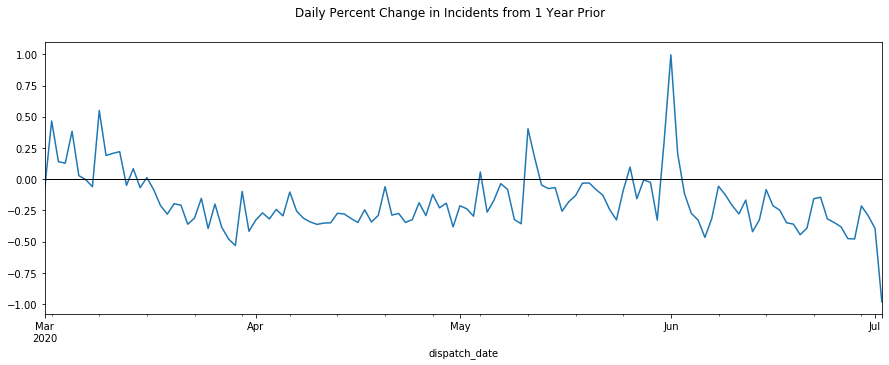

Total Incidents During COVID: 45082
Total Incidents 1 Year Prior: 54450 (-17.2048% change)


In [18]:
#plotting daily percent change
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Daily Percent Change in Incidents from 1 Year Prior")

incidents_yoy = incidents_pivot['All Incidents'].pct_change(periods=365)
incidents_yoy['2020-03-01':].plot()
plt.axhline(linewidth=1, color='black')
plt.show()

#calculating total incidents per period for percent change calc 
incidents_all = incidents_pivot['All Incidents']
incidents_all_c = sum(incidents_all['2020-03-01':])
incidents_all_yp = sum(incidents_all['2019-03-01':'2019-06-30'])


print('Total Incidents During COVID: {}'.format(incidents_all_c))
print('Total Incidents 1 Year Prior: {} ({}% change)'.format(incidents_all_yp, round((incidents_all_c-incidents_all_yp)/incidents_all_yp*100,4)))

**Criminal incidents during the first four months of COVID-19 declined significantly compared to the same period in the prior year.**

Overall, incidents decreased by 17.2% from the same period in the prior year resulting in 9,386 fewer incidents. The decline started in mid-March when non-essential business were closed (March 17) and when the stay at home order was issued (March 23rd). 

The daily percent change from the prior year remained negative until May when some days began to show an increase in incidents or where close to a 0% change. At the end of May, protests over police brutality began and lasted for several days. This resulted in a large increase in daily incidents—one day showing a 100% increase over the prior year. 

After the protests ended, the daily percent change dropped below 0 again and remained negative for the remainder of June. 

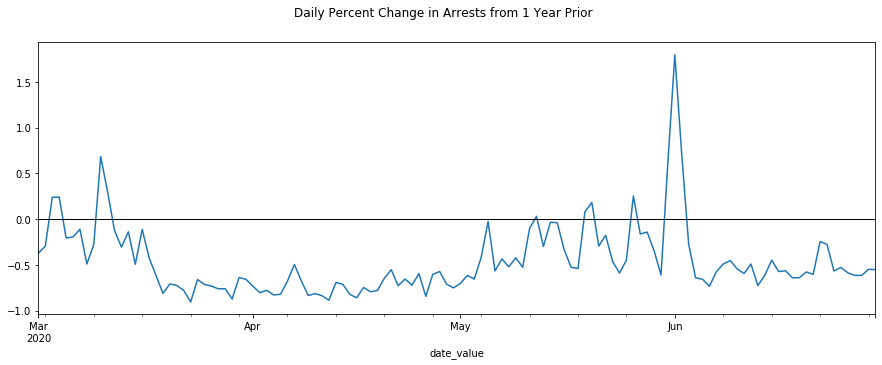

Total Arrests During COVID: 7214
Total Arrests 1 Year Prior: 14009 (-48.5045% change)


In [19]:
#plotting daily percent change
mpl.rcParams['figure.figsize'] = (15,5)
plt.suptitle("Daily Percent Change in Arrests from 1 Year Prior")

arrests_yoy = arrests['All Arrests'].pct_change(periods=365)
arrests_yoy['2020-03-01':].plot()
plt.axhline(linewidth=1, color='black')
plt.show()

#calculating total arrests per period for percent change calc 
arrests_all = arrests['All Arrests']
arrests_all_c = sum(arrests_all['2020-03-01':])
arrests_all_yp = sum(arrests_all['2019-03-01':'2019-06-30'])
arrests_all_mp = sum(arrests_all['2019-11-01':'2020-02-29'])


print('Total Arrests During COVID: {}'.format(arrests_all_c))
print('Total Arrests 1 Year Prior: {} ({}% change)'.format(arrests_all_yp, round((arrests_all_c-arrests_all_yp)/arrests_all_yp*100,4)))

**Arrests decreased by an even greater percentage than criminal incidents compared to the prior year.**

Overall, arrests decreased by 48.5% during the first four months of COVID-19 compared to the same period in the prior year, resulting in 6,795 fewer arrests. 

The decline in arrests followed the same general pattern as the decline in incidents with a decrease in mid-March, a small uptick in May and then a big increase due to the protests. 

While any decrease in incidents can be seen as positive, the steep decline in arrests is less clear cut. A decrease in arrests would be expected if there are fewer incidents, but the decrease in arrests was 2.8 times larger than the decrease in incidents. It's also important to consider that arrests during this period do not necessarily correspond directly to incidents committed in this period, which means that there have likely been fewer arrests for incidents commited prior to COVID-19.

The city will need to pay close attention to how this decrease in arrests will impact overall clearance rates as the year progresses. 